# Challenge - Data Science

## Part 1 - Data ETL, Data Wrangling and Data Exploration

In [1]:
# Let's import the libraries that we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the data 
df1 = pd.read_csv('1623535615-3006-IAJ9206.csv')
df2 = pd.read_csv('1624040490-2957-NAI1549.csv')
df3 = pd.read_csv('1624374799-3006-MYS2071.csv')
df4 = pd.read_csv('1624962426-3006-NAH4736.csv')

In [3]:
#let's see the data
df1

,x,y,z
0,-1.003174,-0.097778,-0.017334
1,-0.993591,-0.084778,-0.009766
2,-0.964844,-0.048462,0.062012
3,-0.868591,-0.010437,0.103577
4,-0.885498,-0.041992,0.078003
...,...,...,...
4975,-1.015808,0.047424,0.120422
4976,-1.054077,-0.048462,-0.051331
4977,-1.090515,-0.046814,-0.054749
4978,-1.070557,-0.042114,-0.030212


### 1. Present the data contained in the files in the time domain.

In [4]:
def time_domain(data,total_duration):
    N = len(data)
    total_duration = 3              # Total duration for the data 3006 ms
    T = total_duration/N

    # The x-axis of your time-domain signal
    t = np.linspace(0, N*T, N)

    plt.figure(figsize=(8,4))
    plt.plot(t,data)
    plt.xlabel('Time(s)')
        

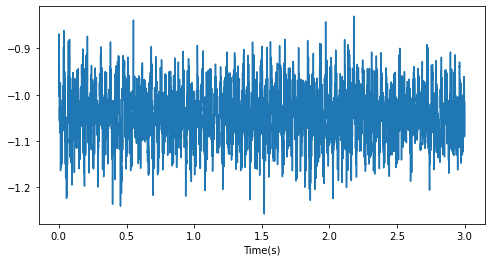

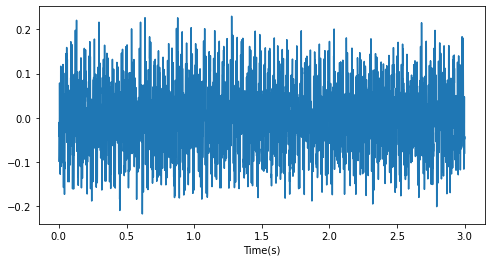

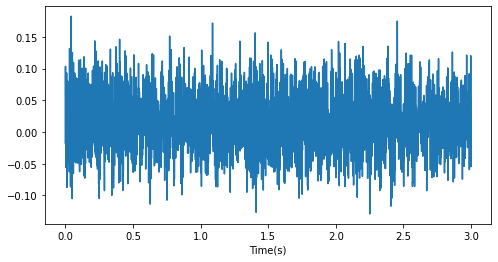

In [5]:
time_domain(df1['x'],3)
time_domain(df1['y'],3)
time_domain(df1['z'],3)

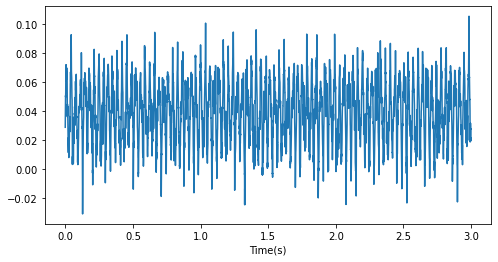

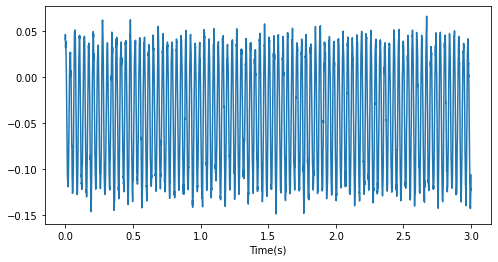

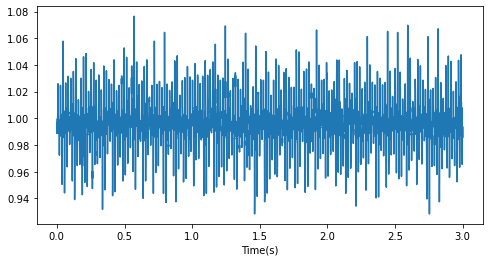

In [6]:
time_domain(df2['x'],2.9)
time_domain(df2['y'],2.9)
time_domain(df2['z'],2.9)

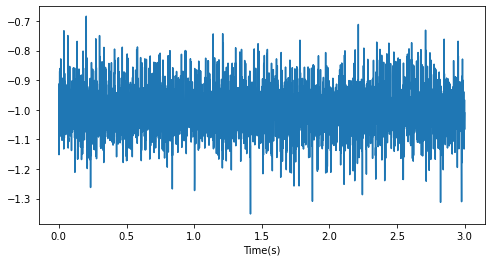

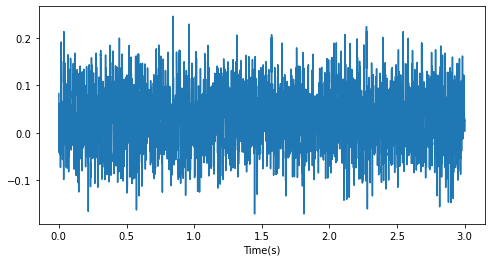

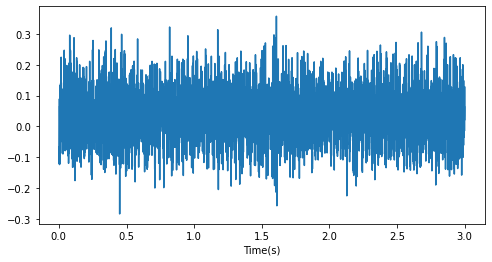

In [7]:
time_domain(df3['x'],3)
time_domain(df3['y'],3)
time_domain(df3['z'],3)

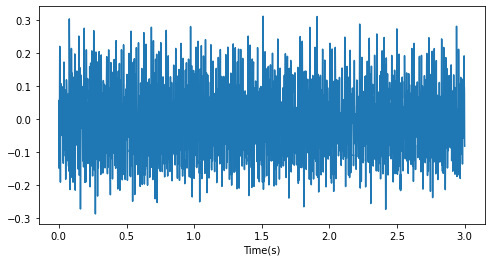

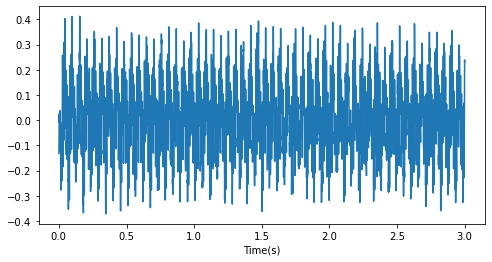

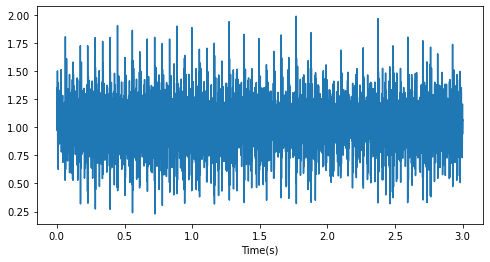

In [8]:
time_domain(df4['x'],3)
time_domain(df4['y'],3)
time_domain(df4['z'],3)

### 2. Present the data contained in the files in the frequency domain (fft).

In [9]:
#function to transfrom data into frequency domain

def fre_domain(data):
# This returns the fourier transform coeficients as complex numbers
    transformed_y = np.fft.fft(data)
    N = len(data)
    # Take the absolute value of the complex numbers for magnitude spectrum
    freqs_magnitude = np.abs(transformed_y)

    # Create frequency x-axis that will span up to sample_rate
    freq_axis = np.linspace(0, N, len(freqs_magnitude))

    # Plot frequency domain
    plt.figure(figsize=(6,3))
    plt.plot(freq_axis, freqs_magnitude)
    plt.xlabel("Frequency (Hz)")
    plt.xlim(0, 100)
    plt.show()

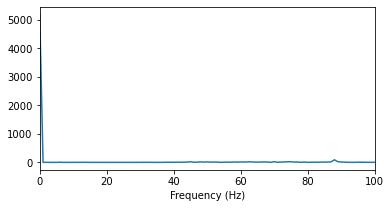

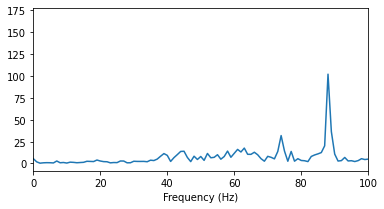

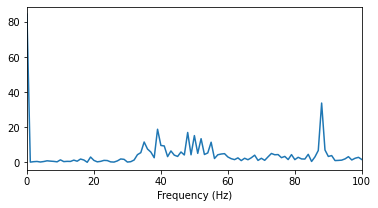

In [10]:
#for acceleration data of '1623535615-3006-IAJ9206'
fre_domain(df1['x'])
fre_domain(df1['y'])
fre_domain(df1['z'])

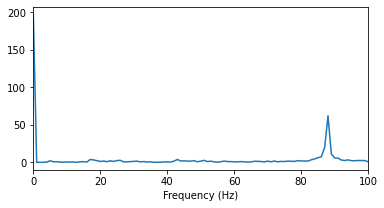

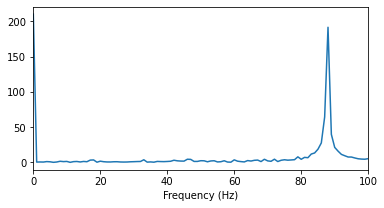

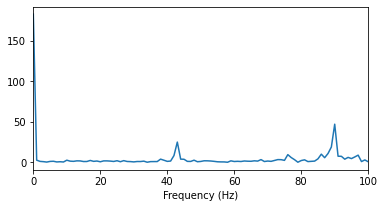

In [11]:
#for acceleration data of '1624040490-2957-NAI1549'
fre_domain(df2['x'])
fre_domain(df2['y'])
fre_domain(df3['z'])

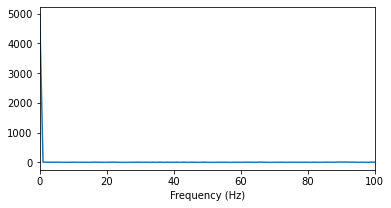

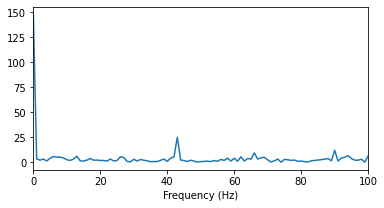

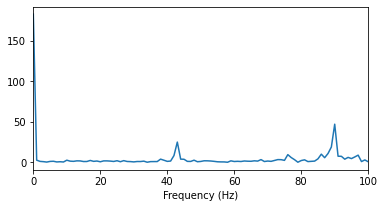

In [12]:
#for acceleration data of '1624374799-3006-MYS2071'
fre_domain(df3['x'])
fre_domain(df3['y'])
fre_domain(df3['z'])

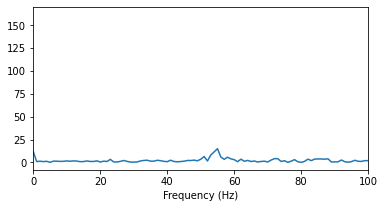

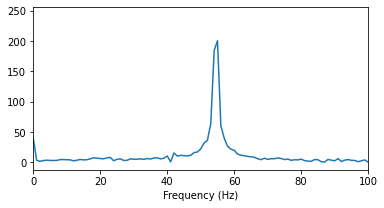

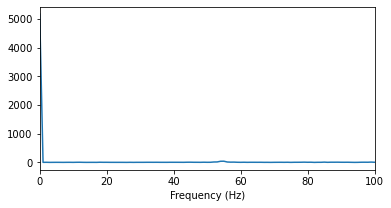

In [13]:
#for acceleration data of '1624962426-3006-NAH4736'
fre_domain(df4['x'])
fre_domain(df4['y'])
fre_domain(df4['z'])

From above visualization, we can see the frequency domain data for all 4 datasets. Due to high negative values, in most of the graphs the the higer magnitude at 0 or below 0 hz. Apart from that we have other high magnitude frequency ponits too.

### 3. Apply filters if necessary to clean and correct signals as best as possible.

In [14]:
import scipy.signal as sig

In [15]:
#for '1623535615-3006-IAJ9206'

#Applying Bandpass filtering
N1 = len(df1)
total_duration = 3          
T1 = total_duration/N1
t1 = np.linspace(0, N1*T1, N1)
order = 3
cutoff_fre = np.array([80,100])
normalise = 2*cutoff_fre/N1
[b,a] = sig.butter(order,normalise, btype='bandpass')

C:\Users\subzz\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


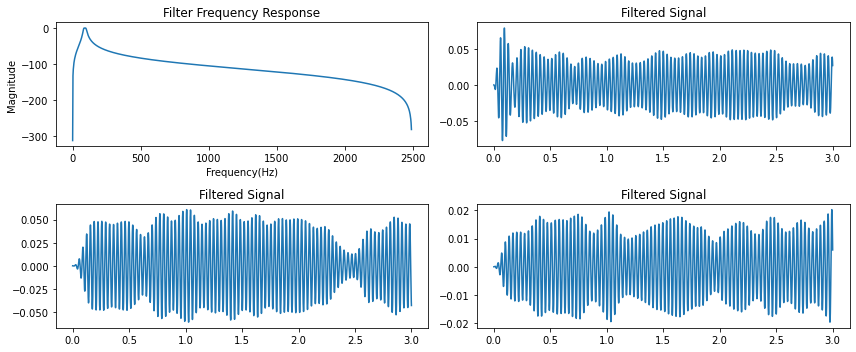

In [16]:
#filter response
[W,h] = sig.freqz(b,a,worN=1024)

W = N1*W/(2*(np.pi))

plt.figure(figsize=(12,5))
plt.subplot(2,2,1)
plt.plot(W, 20*np.log10(h))
plt.title('Filter Frequency Response')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Magnitude')

#filter the signal for x
filt_res = sig.lfilter(b,a,df1['x'])

plt.subplot(2,2,2)
plt.plot(t1,filt_res)
plt.title('Filtered Signal')
plt.tight_layout()

#filter the signal for y
filt_res = sig.lfilter(b,a,df1['y'])

plt.subplot(2,2,3)
plt.plot(t1,filt_res)
plt.title('Filtered Signal')
plt.tight_layout()

#filter the signal for z
filt_res = sig.lfilter(b,a,df1['z'])

plt.subplot(2,2,4)
plt.plot(t1,filt_res)
plt.title('Filtered Signal')
plt.tight_layout()

C:\Users\subzz\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


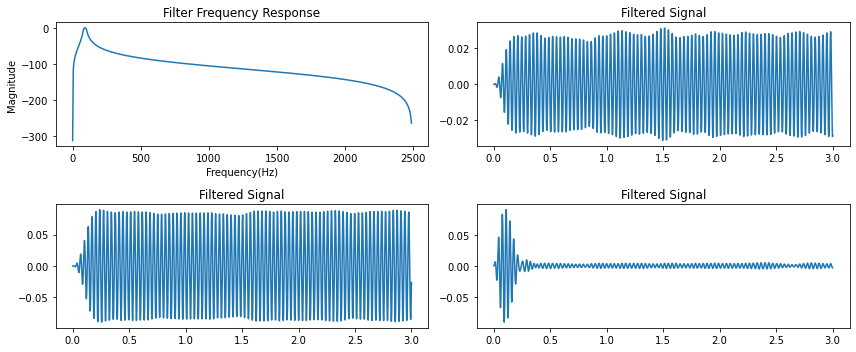

In [17]:
#for '1624040490-2957-NAI1549'

#Applying Bandpass filtering
N2 = len(df2)
total_duration = 3          
T2 = total_duration/N2
t2 = np.linspace(0, N2*T2, N2)
order = 3
cutoff_fre = np.array([80,100])
normalise = 2*cutoff_fre/N2
[b,a] = sig.butter(order,normalise, btype='bandpass')
#filter response
[W,h] = sig.freqz(b,a,worN=512)

W = N2*W/(2*(np.pi))

plt.figure(figsize=(12,5))
plt.subplot(2,2,1)
plt.plot(W, 20*np.log10(h))
plt.title('Filter Frequency Response')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Magnitude')

#filter the signal for x
filt_res = sig.lfilter(b,a,df2['x'])

plt.subplot(2,2,2)
plt.plot(t2,filt_res)
plt.title('Filtered Signal')
plt.tight_layout()

#filter the signal for y
filt_res = sig.lfilter(b,a,df2['y'])

plt.subplot(2,2,3)
plt.plot(t2,filt_res)
plt.title('Filtered Signal')
plt.tight_layout()

#filter the signal for z
filt_res = sig.lfilter(b,a,df2['z'])

plt.subplot(2,2,4)
plt.plot(t2,filt_res)
plt.title('Filtered Signal')
plt.tight_layout()

C:\Users\subzz\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


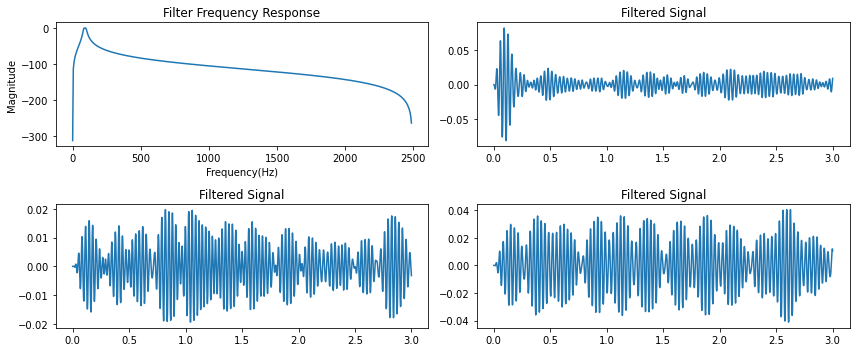

In [18]:
#for '1624374799-3006-MYS2071'

#Applying Bandpass filtering
N3 = len(df3)
total_duration = 3          
T3 = total_duration/N3
t3 = np.linspace(0, N3*T3, N3)
order = 3
cutoff_fre = np.array([80,100])
normalise = 2*cutoff_fre/N3
[b,a] = sig.butter(order,normalise, btype='bandpass')
#filter response
[W,h] = sig.freqz(b,a,worN=512)

W = N3*W/(2*(np.pi))

plt.figure(figsize=(12,5))
plt.subplot(2,2,1)
plt.plot(W, 20*np.log10(h))
plt.title('Filter Frequency Response')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Magnitude')

#filter the signal for x
filt_res = sig.lfilter(b,a,df3['x'])

plt.subplot(2,2,2)
plt.plot(t3,filt_res)
plt.title('Filtered Signal')
plt.tight_layout()

#filter the signal for y
filt_res = sig.lfilter(b,a,df3['y'])

plt.subplot(2,2,3)
plt.plot(t3,filt_res)
plt.title('Filtered Signal')
plt.tight_layout()

#filter the signal for z
filt_res = sig.lfilter(b,a,df3['z'])

plt.subplot(2,2,4)
plt.plot(t3,filt_res)
plt.title('Filtered Signal')
plt.tight_layout()

C:\Users\subzz\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


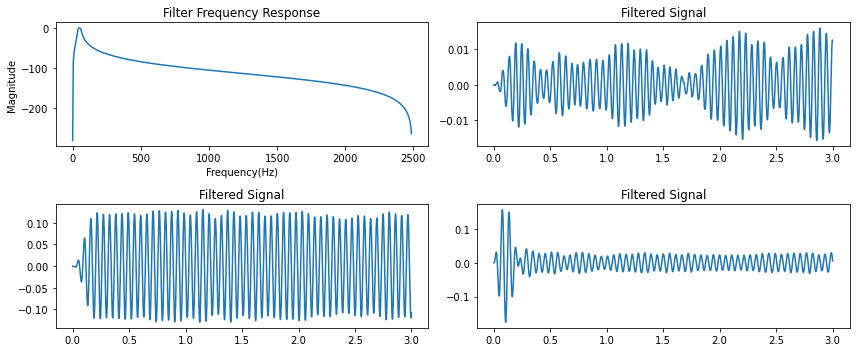

In [19]:
#for '1624962426-3006-NAH4736'

#Applying Bandpass filtering
N4 = len(df4)
total_duration = 3          
T4 = total_duration/N4
t4 = np.linspace(0, N4*T4, N4)
order = 3
cutoff_fre = np.array([40,60])
normalise = 2*cutoff_fre/N4
[b,a] = sig.butter(order,normalise, btype='bandpass')
#filter response
[W,h] = sig.freqz(b,a,worN=512)

W = N4*W/(2*(np.pi))

plt.figure(figsize=(12,5))
plt.subplot(2,2,1)
plt.plot(W, 20*np.log10(h))
plt.title('Filter Frequency Response')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Magnitude')

#filter the signal for x
filt_res = sig.lfilter(b,a,df4['x'])

plt.subplot(2,2,2)
plt.plot(t4,filt_res)
plt.title('Filtered Signal')
plt.tight_layout()

#filter the signal for y
filt_res = sig.lfilter(b,a,df4['y'])

plt.subplot(2,2,3)
plt.plot(t4,filt_res)
plt.title('Filtered Signal')
plt.tight_layout()

#filter the signal for z
filt_res = sig.lfilter(b,a,df4['z'])

plt.subplot(2,2,4)
plt.plot(t4,filt_res)
plt.title('Filtered Signal')
plt.tight_layout()

From above visualization we can see the filtered data in which we have tried to remove noise. One thing I would like to mention that with higher order we may loss the information. So it is better to keep lower order.

### 4. Create a function capable of identifying harmonics and peaks in the frequency domain, in order to reduce the amount of data and filter the relevant information.

In [20]:
#Changing the data into fft datarame

from scipy.fft import fft, fftfreq

def get_fft(df):
    N=len(df)
    fs = len(df)/(df.index[-1]-df.index[0])

    x_plot= fftfreq(N, 1/fs)[:N//2]

    df_fft = pd.DataFrame()
    df_phase = pd.DataFrame()
    for name in df.columns:
        yf = fft(df[name].values)
        y_plot= 2.0/N * np.abs(yf[0:N//2])

        phase = np.unwrap(2 * np.angle(yf)) / 2 * 180/np.pi
        phase = phase[0:N//2]

        df_phase = pd.concat([df_phase,
                            pd.DataFrame({'Frequency (Hz)':x_plot[1:],
                                          name:phase[1:]}).set_index('Frequency (Hz)')],axis=1)
        df_fft = pd.concat([df_fft,
                            pd.DataFrame({'Frequency (Hz)':x_plot[1:],
                                          name:y_plot[1:]}).set_index('Frequency (Hz)')],axis=1)

    return df_fft, df_phase

In [21]:
df_fft1, df_phase1 = get_fft(df1)
df_fft2, df_phase2 = get_fft(df2)
df_fft3, df_phase3 = get_fft(df3)
df_fft4, df_phase4 = get_fft(df4)

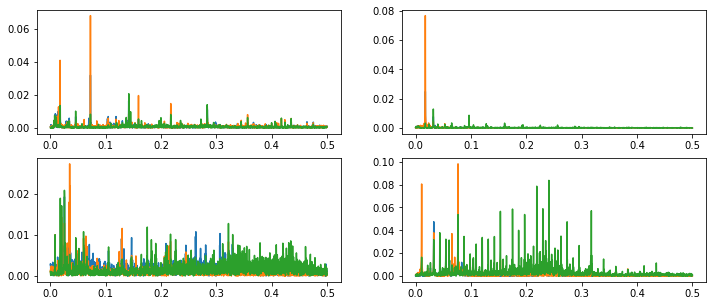

In [22]:
plt.figure(figsize=(12,5))
plt.subplot(2,2,1)
plt.plot(df_fft1)

plt.subplot(2,2,2)
plt.plot(df_fft2)

plt.subplot(2,2,3)
plt.plot(df_fft3)

plt.subplot(2,2,4)
plt.plot(df_fft4)

In [23]:
#function to calculate peak and harmonics
def param_fft(df):
    peak = df.abs().max() #maximum of the absolute values, the peak
    RMS = df.std() #RMS value or harmonics
    stats = pd.concat([peak, #combine the stats into one table
                       RMS],
                      axis=1)
    stats.columns = ['Peak','RMS'] #set the headers of the table
    return stats

In [24]:
param_fft(df1)

,Peak,RMS
x,1.257996,0.056950
y,0.229248,0.073480
z,0.182617,0.042707


In [25]:
param_fft(df2)

,Peak,RMS
x,0.105652,0.021903
y,0.148926,0.061183
z,1.076477,0.015801


In [26]:
param_fft(df3)

,Peak,RMS
x,1.351807,0.076092
y,0.245483,0.060381
z,0.357666,0.082880


In [27]:
param_fft(df4)

,Peak,RMS
x,0.310608,0.096515
y,0.412598,0.144170
z,1.988647,0.229437


## Part 2 - Machine Learning, Deep Learning and Data Driven Solutions:

In [28]:
#load the data
collects = pd.read_csv('collects.csv')
assets = pd.read_csv('assets.csv')

In [29]:
collects

,_id,createdAt,params.accelRMS.x,params.accelRMS.y,params.accelRMS.z,params.duration,params.sampRate,params.timeStart,params.velRMS.x,params.velRMS.y,params.velRMS.z,sensorId,temp
0,60b57955f77013684c413e39,2021-06-01T00:03:33.370Z,0.010463,0.004463,0.011677,3.006,1656.686627,1.622506e+09,0.000511,0.000176,0.000289,IAJ9206,23.94
1,60b57c53f77013684c41409f,2021-06-01T00:16:19.173Z,0.011437,0.004983,0.011482,3.006,1656.686627,1.622507e+09,0.000633,0.000238,0.000292,IAJ9206,23.19
2,60b57f34f77013684c4142cd,2021-06-01T00:28:36.553Z,0.010494,0.005024,0.011120,3.006,1656.686627,1.622507e+09,0.000524,0.000226,0.000246,IAJ9206,22.50
3,60b58237f77013684c41450c,2021-06-01T00:41:27.622Z,0.009859,0.004786,0.011096,3.006,1656.686627,1.622508e+09,0.000437,0.000220,0.000248,IAJ9206,22.87
4,60b58515f77013684c414765,2021-06-01T00:53:41.450Z,0.010014,0.005213,0.011332,3.006,1656.686627,1.622509e+09,0.000501,0.000251,0.000275,IAJ9206,22.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33896,60e4ee0b35645405b62ea2f5,2021-07-06T23:58:03.000Z,0.048851,0.080684,0.063319,2.710,1527.306273,1.625616e+09,0.000762,0.001369,0.001054,NEW4797,54.98
33897,60e4f20435645405b62ea5b4,2021-07-07T00:15:00.431Z,0.049630,0.084657,0.065195,2.710,1527.306273,1.625617e+09,0.000791,0.001380,0.001174,NEW4797,55.35
33898,60e4f62635645405b62ea8b5,2021-07-07T00:32:38.904Z,0.048705,0.069750,0.132227,2.712,1526.179941,1.625618e+09,0.000725,0.001206,0.001403,NEW4797,55.64
33899,60e4fa6035645405b62eabaf,2021-07-07T00:50:40.423Z,0.049600,0.068588,0.131735,2.711,1526.742899,1.625619e+09,0.000740,0.001337,0.001374,NEW4797,55.78


In [30]:
assets

,_id,company,createdAt,description,model,modelType,name,sensors,specifications.axisX,specifications.axisY,specifications.axisZ,specifications.maxDowntime,specifications.maxTemp,specifications.power,specifications.rpm,specifications.workdays
0,602fac7228aba1048d473cc4,5fb2c4eb1369a4325dc4545f,2021-02-19T12:17:54.457Z,NaN,60241102ed8ef30e9d309af9,compressor,Ventilador Acima do Elemento GA160 FF - Prédio...,"[""IAJ9206""]",vertical,horizontal,axial,48.00,NaN,3.7,1735.0,NaN
1,5fd0e297bf7d581c1823b8e4,5fbbadeb82a6b901c26df618,2020-12-09T14:43:35.168Z,NaN,5fd0cf96bf7d581c1823b4c4,heaterFurnace,RDF-61.1,"[""LZY4270""]",axial,vertical,horizontal,0.25,55.0,0.0,1740.0,NaN
2,5fb286de1369a4325dc45433,5f6b83e34dd69d4bc799ea1f,2020-11-16T14:04:14.564Z,-,5fb275981369a4325dc4542e,transformer,TRANSFORMADOR 500 KVA N°1,"[""MUR8453""]",horizontal,vertical,NaN,NaN,65.0,NaN,NaN,NaN
3,6023fad9ed8ef30e9d30952b,5fb2c4eb1369a4325dc4545f,2021-02-10T15:25:13.265Z,NaN,6023f7dced8ef30e9d30945f,pump,Motor Bomba - Tanque de Expansão Tubo Verde,"[""MXK6435""]",horizontal,axial,vertical,48.00,NaN,7.0,3525.0,NaN
4,5ff71a150b6abb7be05083b0,5f17203f640a00cc08cb1b3d,2021-01-07T14:26:29.726Z,NaN,5ff5a854adacd8372cf06950,pump,CAG1- BAGS.12- Motor,"[""MYD8706""]",horizontal,axial,vertical,NaN,NaN,30.0,1765.0,NaN
5,5fd10441bf7d581c1823bf81,5fbbadeb82a6b901c26df618,2020-12-09T17:07:13.817Z,NaN,5fd10441bf7d581c1823bf80,heaterFurnace,VTF-61.1,"[""MYS2071""]",axial,radial,horizontal,0.25,60.0,1.5,894.0,[]
6,5f92d9195676a32f97af5b65,5f8e02389950c66265569378,2020-10-23T13:22:33.577Z,-,604a3f1ba76ffc0ebb727d05,eletricMotor,Boko MA-1510 - Motor 2 da UH,"[""MZU6388""]",horizontal,vertical,radial,NaN,65.0,37.0,1750.0,"[0,1,2,3,4,5]"
7,602fb8a228aba1048d474016,5fb2c4eb1369a4325dc4545f,2021-02-19T13:09:54.165Z,NaN,60241102ed8ef30e9d309af9,compressor,Ventilador -GA75 FF - Prédio B104,"[""NAH4736""]",NaN,NaN,NaN,48.00,NaN,2.0,1080.0,NaN
8,5ff7346c0b6abb7be050876b,5f17203f640a00cc08cb1b3d,2021-01-07T16:18:52.234Z,NaN,5ff5a854adacd8372cf06950,pump,CAG1- BAGS.3- Motor,"[""NAI1549""]",axial,horizontal,vertical,NaN,NaN,75.0,1775.0,NaN
9,5f71d44967198d5d37e27d50,5f6b83e34dd69d4bc799ea1f,2020-09-28T12:17:13.295Z,Rotuladora Sidel,5f71d44867198d5d37e27d4f,other,ROTULADORA SIDEL,"[""NEW4797""]",NaN,NaN,NaN,1.00,70.0,NaN,1458.0,NaN


### Visually present the data contained in each file, along with the asset information to which they belong.


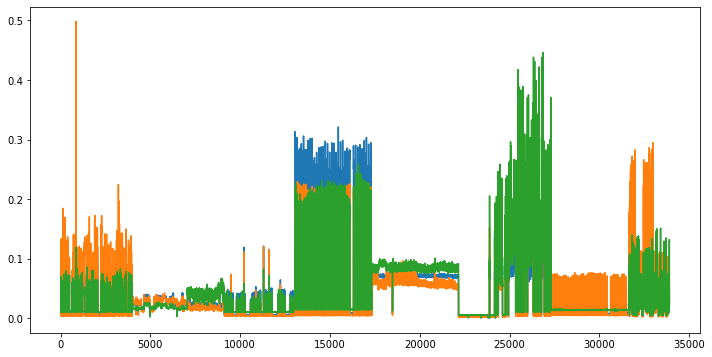

In [31]:
#Let's see how the acceleratio RMS pattern looks like
plt.figure(figsize=(12,6))
plt.plot(collects['params.accelRMS.x'])
plt.plot(collects['params.accelRMS.y'])
plt.plot(collects['params.accelRMS.z'])

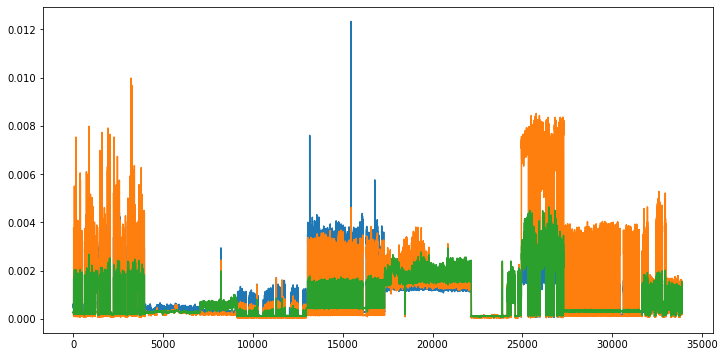

In [32]:
#Visualize the velocity RMS pattern
plt.figure(figsize=(12,6))
plt.plot(collects['params.velRMS.x'])
plt.plot(collects['params.velRMS.y'])
plt.plot(collects['params.velRMS.z'])

C:\Users\subzz\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='params.duration', ylabel='Density'>

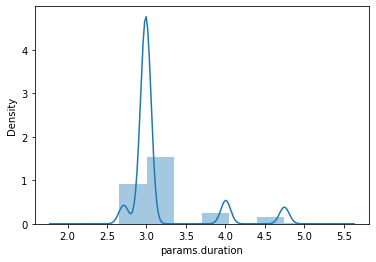

In [33]:
#Let's check the distribution of duration for every assets 
sns.distplot(collects['params.duration'],bins=10)

We can clearly see that most of the assets running duration is near to 3. But for some there are higer values, seems like outliers.

C:\Users\subzz\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


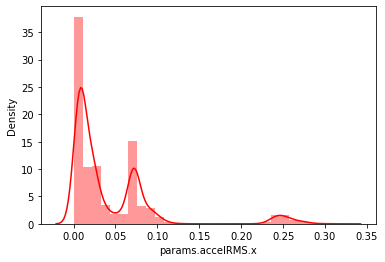

C:\Users\subzz\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


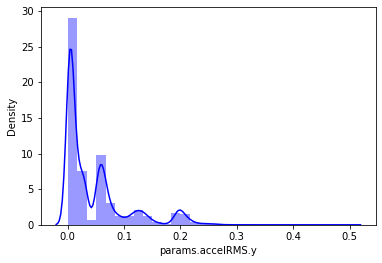

C:\Users\subzz\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


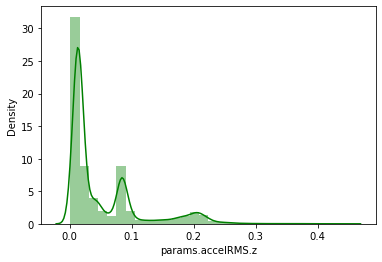

In [34]:
#distribution plot of accelration parameters
sns.distplot(collects['params.accelRMS.x'],bins=30,color='red')
plt.show()
sns.distplot(collects['params.accelRMS.y'],bins=30,color='blue')
plt.show()
sns.distplot(collects['params.accelRMS.z'],bins=30,color='green')
plt.show()

Most of the data is in Right/positive skewed but still have some negative values and some outliers

C:\Users\subzz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sensorId', ylabel='count'>

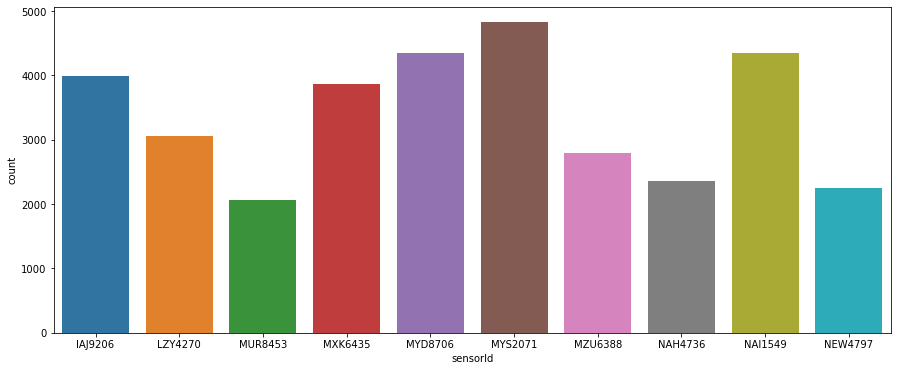

In [35]:
#find out type of sensors and how many of each available
plt.figure(figsize=(15,6))
sns.countplot(collects['sensorId'])

<Figure size 1080x432 with 0 Axes>

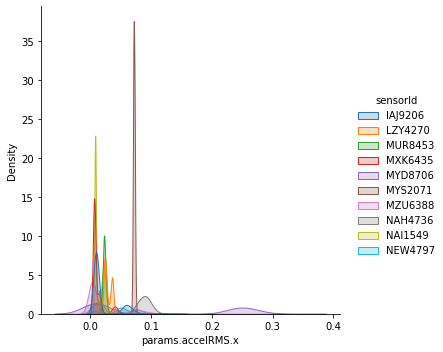

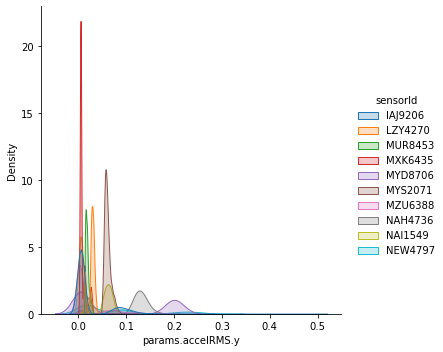

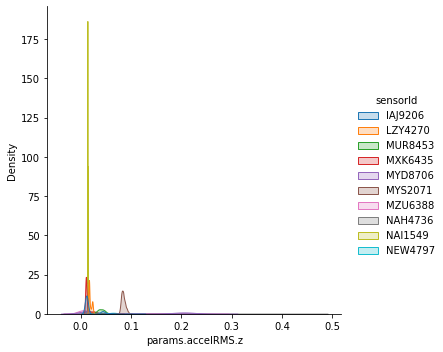

In [36]:
#distributt=ion of accelration data with respect to sensors. It will give a better idea about every sensor.
plt.figure(figsize=(15,6))
sns.displot(collects, x="params.accelRMS.x", hue="sensorId", kind="kde", fill=True)
plt.show()
sns.displot(collects, x="params.accelRMS.y", hue="sensorId", kind="kde", fill=True)
plt.show()
sns.displot(collects, x="params.accelRMS.z", hue="sensorId", kind="kde", fill=True)
plt.show()

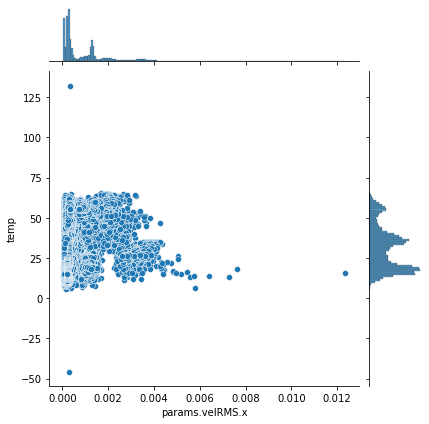

In [37]:
#find out the relationship between valocity and temperation of assets
sns.jointplot(data=collects, x="params.velRMS.x", y="temp")

C:\Users\subzz\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='temp', ylabel='Density'>

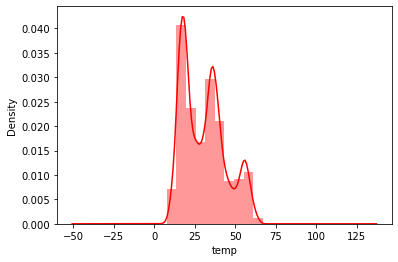

In [38]:
#distribution plot to find out the range of temperature
sns.distplot(collects['temp'],bins=30,color='red')

C:\Users\subzz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='modelType', ylabel='count'>

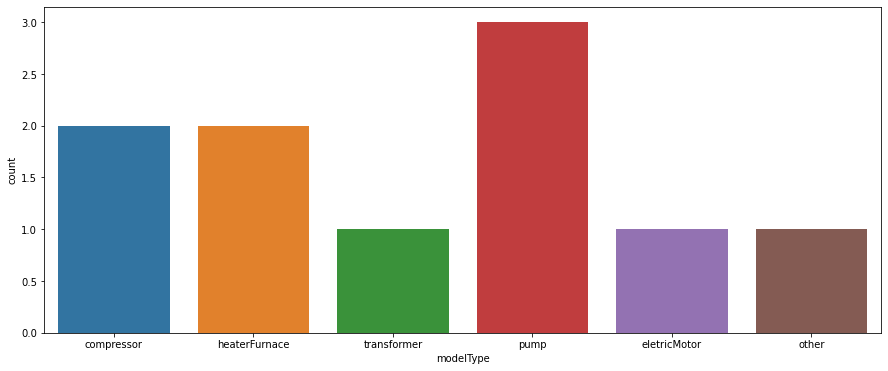

In [39]:
#types of models availabe and their quantities
plt.figure(figsize=(15,6))
sns.countplot(assets['modelType'])

C:\Users\subzz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='company', ylabel='count'>

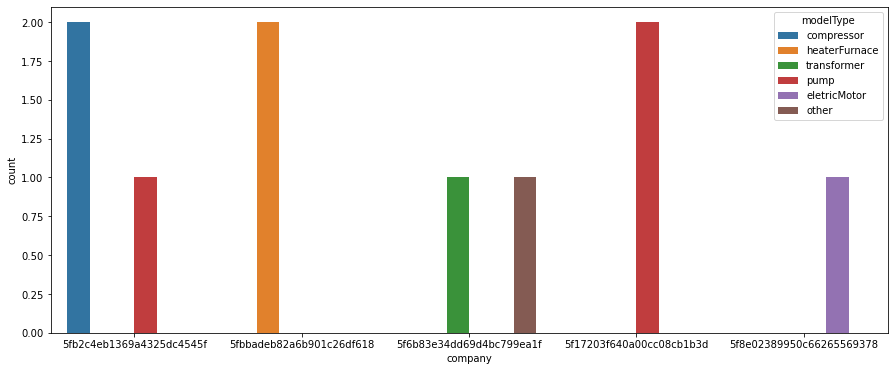

In [40]:
#Number of sompanies having different assets
plt.figure(figsize=(15,6))
sns.countplot(assets['company'],hue=assets['modelType'])

### Develop a model/function capable of calculating downtime and uptime for any asset.

In [41]:
'''In any industry, there is a fix working hour for every day, let say 8 hours. It is also called as Planned operating time.
But due to faliure of machine or any other reasons, industry faols to operate exactly same planned hours.

Downtime is the numbers of hours/minutes, in which a particular machine/service did not operate.
DT = Planned Operating time - Actual Operating time

Uptime which is also known as Availability is the ratio of actual operating time and planned operating time.
UT = (Planned Operating time-DT)/Planned Operating time'''


def uptime_downtime(planned_time,actual_time):
    DT = planned_time - actual_time
    
    UT = (actual_time)/planned_time
    
    return DT, UT

In [42]:
#let say planned time is 8 hr and actual is 6 hr

print('The Downtime and Uptime for the machine is: ',uptime_downtime(8,6))

The Downtime and Uptime for the machine is:  (2, 0.75)


### Develop a model/function capable of identifying changes in vibration patterns for any asset.

### Identify possible asset failures using the model developed in item 3 or a new model (the identification must be autonomous and not a visual analysis).


I'm going to do an anomaly detection using PCA. This can help in identifying the change in pattern and will identify the failures too because of that change in pattern.

In [43]:
data = collects[['createdAt','params.accelRMS.x', 'params.accelRMS.y', 'params.accelRMS.z']]
data = data.set_index('createdAt')

In [44]:
train_data = data[:23731]
test_data = data[23731:]

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = pd.DataFrame(scaler.fit_transform(train_data), 
                              columns=train_data.columns, 
                              index=train_data.index)
# Random shuffle training data
X_train.sample(frac=1)

X_test = pd.DataFrame(scaler.transform(test_data), 
                             columns=test_data.columns, 
                             index=test_data.index)

In [46]:
X_train.isna().sum()

params.accelRMS.x    357
params.accelRMS.y    357
params.accelRMS.z    357
dtype: int64

In [47]:
X_test.isna().sum()

params.accelRMS.x    103
params.accelRMS.y    103
params.accelRMS.z    103
dtype: int64

In [48]:
#dropping the null values
X_train = X_train.dropna()
X_test = X_test.dropna()

In [49]:
X_train.isna().sum()
X_test.isna().sum()

params.accelRMS.x    0
params.accelRMS.y    0
params.accelRMS.z    0
dtype: int64

In [50]:
#use PCA for dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=2, svd_solver= 'full')
X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(X_train_PCA)
X_train_PCA.index = X_train.index

X_test_PCA = pca.transform(X_test)
X_test_PCA = pd.DataFrame(X_test_PCA)
X_test_PCA.index = X_test.index

In [51]:
#Define train/test set from the two main principal components 
data_train = np.array(X_train_PCA.values)
data_test = np.array(X_test_PCA.values)

#function to calculate covariance
def cov_matrix(data, verbose=False):
    covariance_matrix = np.cov(data, rowvar=False)
    if is_pos_def(covariance_matrix):
        inv_covariance_matrix = np.linalg.inv(covariance_matrix)
        if is_pos_def(inv_covariance_matrix):
            return covariance_matrix, inv_covariance_matrix
        else:
            print("Error: Inverse of Covariance Matrix is not positive definite!")
    else:
        print("Error: Covariance Matrix is not positive definite!")
        
#Calculate the Mahalanobis distance
def MahalanobisDist(inv_cov_matrix, mean_distr, data, verbose=False):
    inv_covariance_matrix = inv_cov_matrix
    vars_mean = mean_distr
    diff = data - vars_mean
    md = []
    for i in range(len(diff)):
        md.append(np.sqrt(diff[i].dot(inv_covariance_matrix).dot(diff[i])))
    return md

#Function to detect outliers
def MD_detectOutliers(dist, extreme=False, verbose=False):
    k = 3. if extreme else 2.
    threshold = np.mean(dist) * k
    outliers = []
    for i in range(len(dist)):
        if dist[i] >= threshold:
            outliers.append(i)  # index of the outlier
    return np.array(outliers)

#calculating threshold point
def MD_threshold(dist, extreme=False, verbose=False):
    k = 3. if extreme else 2.
    threshold = np.mean(dist) * k
    return threshold

#Check if matrix is positive definite
def is_pos_def(A):
    if np.allclose(A, A.T):
        try:
            np.linalg.cholesky(A)
            return True
        except np.linalg.LinAlgError:
            return False
    else:
        return False

#calculating covariance and inverse cov.
cov_matrix, inv_cov_matrix  = cov_matrix(data_train)

mean_distr = data_train.mean(axis=0)

#calculate the Mahalanobis distance for the datapoints in the test set, and compare that with the anomaly threshold
dist_test = MahalanobisDist(inv_cov_matrix, mean_distr, data_test, verbose=False)
dist_train = MahalanobisDist(inv_cov_matrix, mean_distr, data_train, verbose=False)
threshold = MD_threshold(dist_train, extreme = True)

In [52]:
#save the Mahalanobis distance, threshold value and “anomaly flag” variable for both train and test data in a dataframe
anomaly_train = pd.DataFrame()
anomaly_train['Mob dist']= dist_train
anomaly_train['Thresh'] = threshold
# If Mob dist above threshold: Flag as anomaly
anomaly_train['Anomaly'] = anomaly_train['Mob dist'] > anomaly_train['Thresh']
anomaly_train.index = X_train_PCA.index
anomaly = pd.DataFrame()
anomaly['Mob dist']= dist_test
anomaly['Thresh'] = threshold
# If Mob dist above threshold: Flag as anomaly
anomaly['Anomaly'] = anomaly['Mob dist'] > anomaly['Thresh']
anomaly.index = X_test_PCA.index
anomaly.head()

,Mob dist,Thresh,Anomaly
createdAt,,,
2021-06-19T23:04:57.629Z,0.791965,3.420629,False
2021-06-19T23:33:58.470Z,0.790110,3.420629,False
2021-06-19T23:46:27.882Z,0.795996,3.420629,False
2021-06-20T00:04:00.614Z,0.786388,3.420629,False
2021-06-20T00:15:32.690Z,0.784209,3.420629,False


In [53]:
#merge and save the anomaly and anomaly train data
anomaly_alldata = pd.concat([anomaly_train, anomaly])
anomaly_alldata.to_csv('Anomaly_distance.csv')

<AxesSubplot:xlabel='createdAt'>

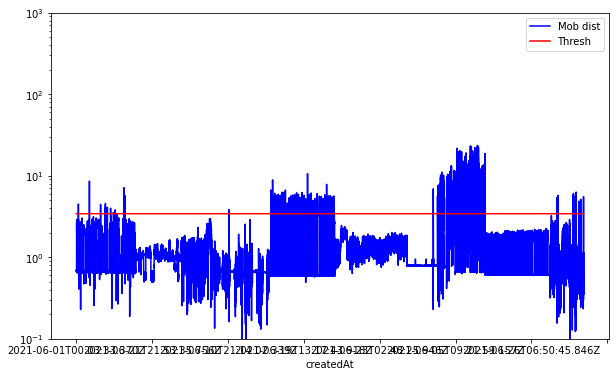

In [54]:
#let's varify PCA model on test data
anomaly_alldata.plot(logy=True, figsize = (10,6), ylim = [1e-1,1e3], color = ['blue','red'])